# Car Dimensions: A Look Through Time

Have cars of the same model grown larger over the years, or does the change in size depend on the specific model?

To explore this question, we have a dataset in the file `car-dimensions.csv`, which presents the `length`, `width`, and `height` (all in millimeters) for 53 car models. This dataset includes measurements from the earliest generation of each model that we could find, as well as data from the latest model. 

By analyzing this information, we can uncover trends and patterns in the evolution of car dimensions over time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('car-dimensions.csv')
df.head(4)

,brand_model,length,width,height,year,generation
0,Audi A4,4520,1733,1415,1994,first
1,Audi A4,4762,1847,1427,2015,latest
2,BMW 3 Series,4355,1610,1380,1975,first
3,BMW 3 Series,4829,1827,1442,2018,latest


In [2]:
first_generation = df.query('generation == "first"')
first_generation.head(2)

,brand_model,length,width,height,year,generation
0,Audi A4,4520,1733,1415,1994,first
2,BMW 3 Series,4355,1610,1380,1975,first


In [3]:
latest_generation = df.query('generation == "latest"')
latest_generation.head(2)

,brand_model,length,width,height,year,generation
1,Audi A4,4762,1847,1427,2015,latest
3,BMW 3 Series,4829,1827,1442,2018,latest


In [4]:
# helper function, change gap, vertical alignment, horizontal alignment, placement of gap...
def add_labels(df, x_col, y_col, label_col):
	for i, row in df.iterrows():
		x = row[x_col]
		y = row[y_col]
		gap = "  "
		label = gap + row[label_col]
		plt.text(x, y, label, va='center', ha='left')


	
- Create horizontal bar plots showing which car models have changed the least or most for a variable of your choice.

Below is a preliminary paired scatter plot of car `length` to get you started. 

- Create paired scatter plots of car `width`, `length`, or `height`.

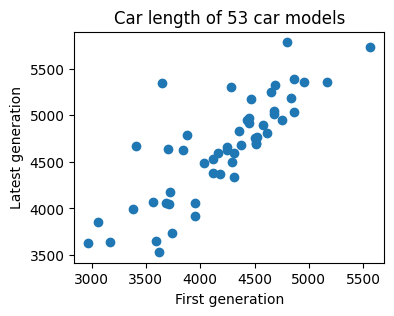

In [5]:
plt.figure(figsize=(4, 3))  
plt.scatter(first_generation['length'], latest_generation['length'])
plt.xlabel('First generation')
plt.ylabel('Latest generation')
plt.title('Car length of 53 car models')
plt.show()

- Create new variables such as:
	- `car footprint = (length * width)`
	- `percent change = (latest - first) / first`

In [ ]:
# New footprint values for each generations
df['footprint'] = df.eval('width * length')

# Percent change for each generation
last_gen = df.query('generation == "latest"')
first_gen = df.query('generation == "first"')
df2 = last_gen.merge(first_gen, on='brand_model', how='left',
               suffixes=('_firstGen', '_lastGen'))

# Clean
df2 = df2[['footprint_firstGen', 'footprint_lastGen']]

# Calculate percent change between generation
df2['percent_change'] = df2.eval('(footprint_firstGen - footprint_lastGen) / footprint_firstGen * 100')


,footprint_firstGen,footprint_lastGen,percent_change
0,8795414,7833160,10.940406
1,8822583,7011550,20.527242
2,10512450,8748000,16.784384
3,8949790,7533477,15.825098
4,11035824,10297016,6.694634
5,11809980,11252430,4.721007
6,10455762,8171972,21.842406
7,7022400,4934800,29.727728
8,6112656,3920400,35.864214
9,10120200,8346223,17.529071
